In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global NumSpecies,mu,gamma,D,eta,kappa,delta

In [3]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    thresh=0
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            sumy=sumy+y[j]
        xxx=sum(y[np.arange(NumSpecies+i,NumSpecies*(1+NumSpecies),NumSpecies)])-y[NumSpecies+i*NumSpecies+i];
        dydt[i]=mu[i]*y[i]*(1-(gamma*sumy-gamma*y[i]+y[i]+delta*xxx))-D*y[i]
        for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*(1-(gamma*sumy-gamma*y[i]+y[i]+delta*xxx))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt


In [4]:
NumSpecies=2
deltas=[0,0.2,0.4]
etas=np.arange(0,0.25,0.05)
repeat=2000
richness=np.zeros((len(deltas),len(etas),repeat))
CoexistProb=np.zeros((len(deltas),len(etas)))
thresh=0.01
for uio in range(len(deltas)):
    delta=deltas[uio]
    gamma=0.6
    kappa=0.005
    D=0.2
    initial=np.zeros(NumSpecies**2+NumSpecies)
    for i in range(NumSpecies):
        initial[i]=1/NumSpecies
        initial[NumSpecies+i*NumSpecies+i]=initial[i]
    timespan=np.arange(0,200.1,0.1)

    for i in range(len(etas)):
        print(i)
        eta=etas[i]
        for hjk in range(repeat):
            mu=np.random.rand(NumSpecies)
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            temp=y[-1,range(NumSpecies)]
            temp=np.divide(temp,sum(temp))
            richness[uio,i,hjk]=sum(y[-1,range(NumSpecies)]>thresh)
        CoexistProb[uio,i]=sum(richness[uio,i,:]==NumSpecies)/repeat


0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


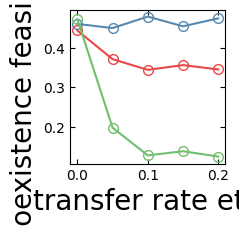

In [5]:
plt.figure(figsize=(2,2))
for i in range(len(deltas)):
    if i==0:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.3467,0.5360,0.6907))
    if i==1:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.9153,0.2816,0.2878))
    if i==2:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.4416,0.7490,0.4322))
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('Species2.pdf')
plt.show()

In [6]:
import pandas as pd
df=pd.DataFrame(CoexistProb)
df.to_csv("Species2.csv")